In [29]:
!pip install wordcloud


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 300.7/300.7 kB 1.1 MB/s eta 0:00:00


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk

In [44]:
class data_loader:
    def __init__(self, path):
        self.path = path
        self.data = None

    def load_data(self):
        # Load emails
        self.data = pd.read_csv(self.path, encoding='latin1')
        return self.data

In [45]:
# call class
path = 'spam.csv'
data_loader = data_loader(path)
data = data_loader.load_data()
print(data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [46]:
class data_Analyzer(DataLoader):
    def __init__(self, path):
        super().__init__(path)

    def clean_data(self):
        # Rename columns
        self.data.columns = ['label', 'message', 'col3', 'col4', 'col5']
        # Drop unnecessary columns
        self.data = self.data.drop(['col3', 'col4', 'col5'], axis=1)
        # Drop rows with missing values
        self.data.dropna(inplace=True)
        return self.data

    def plot_distribution(self):
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.data, x='label')
        plt.title('Distribution of Ham and Spam Messages')
        plt.xlabel('Label')
        plt.ylabel('Count')
        plt.show()

    def plot_message_length_distribution(self):
        self.data['message_length'] = self.data['message'].apply(len)

        plt.figure(figsize=(8, 6))
        sns.histplot(self.data[self.data['label'] == 'ham']['message_length'], kde=True, color='blue', label='Ham', bins=30)
        sns.histplot(self.data[self.data['label'] == 'spam']['message_length'], kde=True, color='red', label='Spam', bins=30)
        plt.title('Distribution of Message Length')
        plt.xlabel('Message Length')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

    def get_message_length_stats(self):
        self.data['message_length'] = self.data['message'].apply(len)
        ham_stats = self.data[self.data['label'] == 'ham']['message_length'].describe()
        spam_stats = self.data[self.data['label'] == 'spam']['message_length'].describe()
        return ham_stats, spam_stats

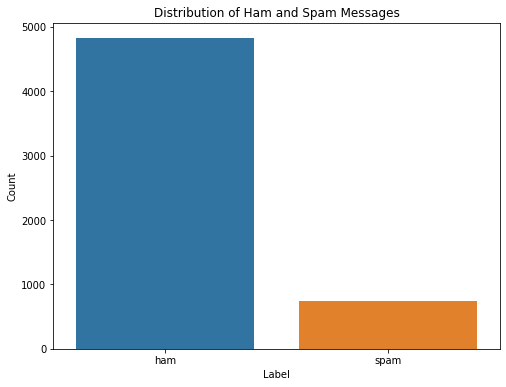

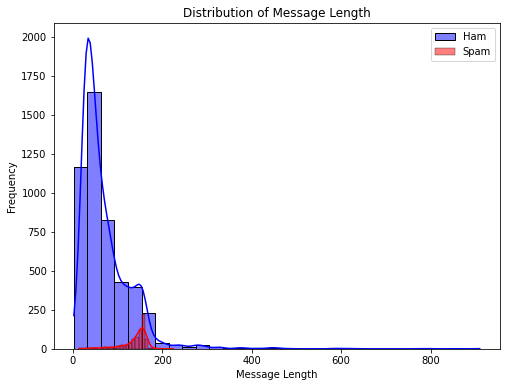

Ham Message Length Stats:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: message_length, dtype: float64

Spam Message Length Stats:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64


In [47]:
# call data analyzer
data_analyzer = data_Analyzer(path)
data = data_analyzer.load_data()
cleaned_data = data_analyzer.clean_data()
data_analyzer.plot_distribution()
data_analyzer.plot_message_length_distribution()
ham_stats, spam_stats = data_analyzer.get_message_length_stats()
print("Ham Message Length Stats:\n", ham_stats)
print("\nSpam Message Length Stats:\n", spam_stats)


In [56]:
class AdvancedDataAnalyzer(data_Analyzer):
    def __init__(self, path):
        super().__init__(path)

    def generate_word_cloud(self, label, colormap='viridis'):
        text = ' '.join(self.data[self.data['label'] == label]['message'])
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {label.capitalize()} Messages', fontsize=20)
        plt.show()

    def get_top_words(self, label, n=10):
        text = ' '.join(self.data[self.data['label'] == label]['message'])
        words = text.split()
        word_counts = Counter(words)
        return word_counts.most_common(n)

    def plot_top_words(self, label, n=10):
        top_words = self.get_top_words(label, n)
        words, counts = zip(*top_words)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(counts), y=list(words), palette='viridis')
        plt.title(f'Top {n} Words in {label.capitalize()} Messages', fontsize=20)
        plt.xlabel('Count')
        plt.ylabel('Words')
        plt.show()


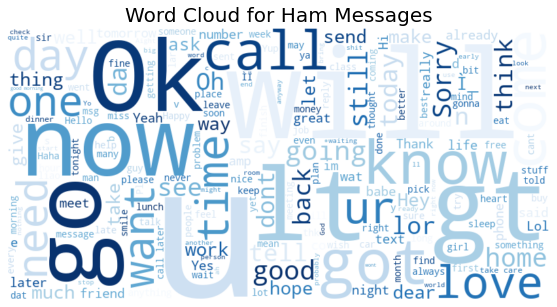

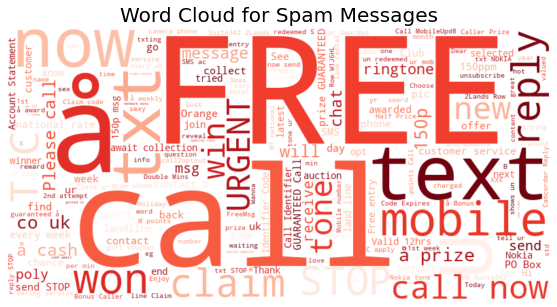

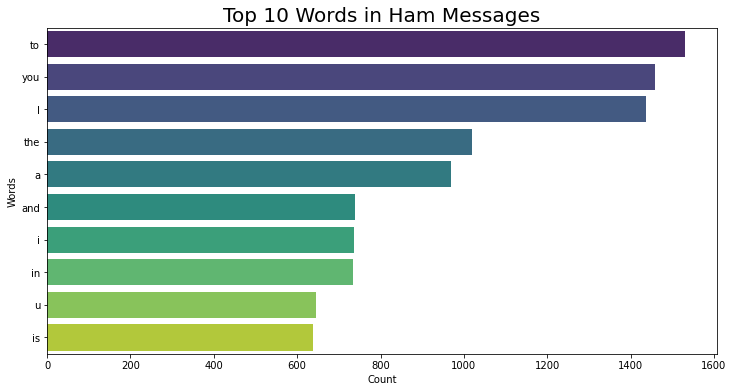

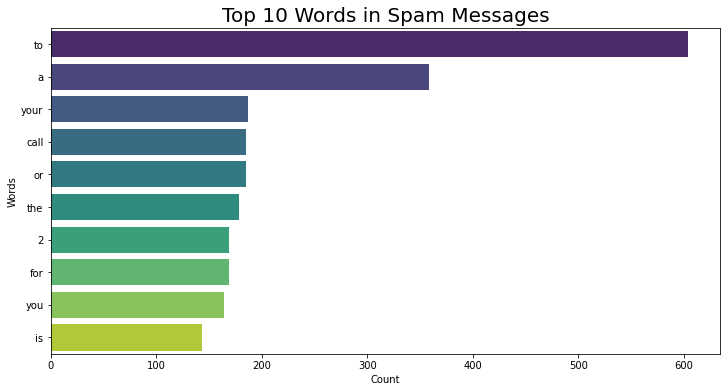

In [57]:
# call Advance_data_analyzer
advanced_analyzer = AdvancedDataAnalyzer(path)
data = advanced_analyzer.load_data()
cleaned_data = advanced_analyzer.clean_data()

advanced_analyzer.generate_word_cloud('ham', colormap='Blues')
advanced_analyzer.generate_word_cloud('spam', colormap='Reds')
advanced_analyzer.plot_top_words('ham')
advanced_analyzer.plot_top_words('spam')
